In [1]:
#Skylar Haskiel
import pandas as pd
pd.set_option('display.max_columns', 50)

import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import re

from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# pull in data
df = pd.read_pickle("../../../data/prd/Paper/FR_meta_and_final_tokens_23DEC21.pkl")
df.reset_index(inplace = True, drop = True)

In [3]:
# df.head()

In [4]:
# df.shape

In [5]:
# df.dtypes

In [6]:
docs = df["final_tokens"]  
ids = df["PROJECT_TERMS"]

In [7]:
#counts number of abstracts that contain 'internet'
term_match_int = []
for i, abstract in enumerate(docs):
        if ('internet' in abstract):
            term_match_int.append(i)

In [8]:
len(term_match_int)

10653

In [9]:
# grabs all internet and thing or iot matches

term_match_idx = []

for i, abstract in enumerate(docs):
    if ('internet' in abstract): 
        if ('thing' in abstract or 'iot' in abstract ):
            term_match_idx.append(i)
 

In [10]:
len(term_match_idx) 

1404

In [ ]:
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(docs)

terms = vectorizer.get_feature_names()

In [ ]:
dtm.shape

In [ ]:
#checks for all terms relating to internet 
count = 0

for term in terms:
    if 'internet' in term:
        
#             print(term)
            count = count + 1
        
print(count)

In [ ]:
#total number of terms relating to the word internet 
term_counts = dtm.sum(axis=0)

In [ ]:
#checks terms with both internet and thing or iot
icount = 0
for term in terms:
    if 'internet' in term:
        if 'thing' in term or 'iot' in term:
#             print(term)
            icount = icount + 1
        
print(icount)

In [ ]:
#will create set of all terms with internet and thing or iot and list their frequency
di = {}

for i, term in enumerate(terms):
    if 'internet' in term:
        if 'thing' in term or 'iot' in term:
        #print(term)
            di[term] = term_counts[0,i]
            

In [ ]:
di

In [ ]:
#creates a new data set with just internet terms

In [ ]:
docs_ix = np.concatenate([term_match_idx]) 

In [ ]:
docs_idx = np.unique(docs_ix)

In [ ]:
# docs_idx.shape

In [ ]:
filt_corpus = df.loc[docs_idx, :]

In [ ]:
filt_corpus.shape

In [ ]:
#removes abstracts with no terms from data set
filt_corpus = filt_corpus[~filt_corpus.PROJECT_TERMS.isnull()]
# filt_corpus = filt_corpus[filt_corpus.PROJECT_TERMS != "Research"] this doesnt work to remove research

In [ ]:
#calculates the top 40 keywords in the data set
wrd_frq = pd.Series(' '.join(filt_corpus.PROJECT_TERMS).split())
wrd_frq = wrd_frq.str.lower()
wrd_frq = wrd_frq.str.rstrip(";")
wrd_frq = wrd_frq.str.rstrip("s")
wrd_frq = wrd_frq.value_counts()


In [ ]:
wrd_frq[0:50]

In [ ]:
# # plot
# keyword = wrd_frq.index.tolist()
# count = wrd_frq.values

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_axisbelow(True)
# plt.grid(True, color = "whitesmoke")
# plt.bar(keyword, count, color='blue')
# plt.ylim(0,100)
# plt.xlabel("Keyword")
# plt.ylabel("Frequency")
# plt.title("Keyword Frequency")

In [ ]:
filt_corpus["FY"] = filt_corpus["FY"].astype('int')

In [57]:
year_counts = filt_corpus['FY'].value_counts().sort_index(ascending=True)
print(year_counts)

2008    64
2009    92
2010    75
2011    87
2012    59
2013    45
2014    38
2015    42
2016    46
2017    44
2018    59
2019    56
2020    66
Name: FY, dtype: int64


In [58]:
cb_pal = {"blue":'#377eb8', "orange":'#ff7f00', "green":'#4daf4a', "pink":'#f781bf', "brown":'#a65628', 
          "purple":'#984ea3', "gray":'#999999', "red":'#e41a1c', "yellow":'#dede00'}


<ipython-input-59-6183db04efd2>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


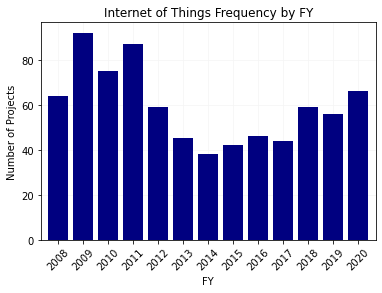

In [59]:
year = year_counts.index.tolist()
count = year_counts.values

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_axisbelow(True)
plt.grid(True, color = "whitesmoke")
plt.bar(year, count, color='navy')
#plt.xlim(-0.7, len(year)-0.3)
plt.xlim(2007.3,2020.7)
plt.xticks(year, rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
#x_ticks = ax.xaxis.get_major_ticks()
#x_ticks[-1].label1.set_visible(False)
plt.xlabel("FY")
plt.ylabel("Number of Projects")
plt.title("Internet of Things Frequency by FY")

plt.savefig("startyr_freq.png", dpi = 800, bbox_inches = "tight")
plt.savefig("startyr_freq.pdf", dpi = 800, bbox_inches = "tight")